In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [3]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/heart.csv")

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică.
După instalare trebuie să facem restart la runtime.

In [ ]:
!pip uninstall pandas-profiling

In [8]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=6a5807721a489b677e677ba32fcef85c76947807caa37cfb20c3efaf94544484
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [9]:
from ydata_profiling import ProfileReport

In [10]:
prof=ProfileReport(df)

In [ ]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

In [ ]:
prof

In [ ]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [ ]:
prof.to_file(output_file='/content/output-min.html')

In [ ]:
prof

In [11]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("target", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['target']

In [12]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [32]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [33]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(500, 952)

In [34]:
sum(y_test), len(y_test)

(129, 238)

In [35]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
X_train

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
550,68,1,1,139,181,1,1,135,0,0.2,1
1089,57,1,3,150,126,1,0,173,0,0.2,1
4,54,1,3,150,195,0,0,122,0,0.0,1
38,48,0,2,120,177,1,1,148,0,0.0,1
460,41,1,4,104,0,0,1,111,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
892,56,1,2,120,236,0,0,178,0,0.8,1
410,53,1,3,160,0,1,2,122,1,0.0,2
198,42,1,2,150,268,0,0,136,0,0.0,1
326,42,1,4,105,0,1,0,128,1,-1.5,3


In [37]:
y_train

550     0
1089    0
4       0
38      0
460     0
       ..
892     0
410     1
198     0
326     1
982     1
Name: target, Length: 952, dtype: int64

In [38]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
scaler = StandardScaler()

sc = MinMaxScaler((-1, 1))

In [39]:
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_test

array([[ 0.0350104 ,  0.5644108 ,  0.80493036, ...,  1.26253929,
        -0.86564106,  0.62737958],
       [ 0.88417996,  0.5644108 , -2.41479108, ...,  1.26253929,
         0.34434016,  0.62737958],
       [ 1.41491093,  0.5644108 ,  0.80493036, ...,  1.26253929,
         0.53049112,  0.62737958],
       ...,
       [ 1.41491093,  0.5644108 ,  0.80493036, ..., -0.79205456,
         0.06511373,  0.62737958],
       [ 0.35344899,  0.5644108 ,  0.80493036, ...,  1.26253929,
         0.99586851,  0.62737958],
       [ 0.67188757, -1.77175914,  0.80493036, ..., -0.79205456,
        -0.86564106, -1.03169086]])

In [42]:
print(scaler.mean_)

[ 53.67016807   0.75840336   3.25       132.37920168 209.94537815
   0.21638655   0.70693277 139.92121849   0.3855042    0.93004202
   1.62184874]


In [43]:
len(X_train)

952

In [44]:
from torch.utils.data import Dataset, DataLoader

In [45]:
import torch
from torch import nn, optim

In [46]:
#Dataset - o clasă din PyTorch foarte utilă gestionării seturilor de date
class Dataset(Dataset):
    """ Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [47]:
trainDataset=Dataset(X_train, y_train)

In [48]:
trainDataset[0]

(tensor([ 1.5211,  0.5644, -2.4148,  0.3646, -0.2877,  1.9030,  0.3358, -0.1955,
         -0.7921, -0.6795, -1.0317]),
 tensor(0))

In [49]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [50]:
validationDataset=Dataset(X_test, y_test)

In [51]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [189]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output.
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(11,10),
            nn.ReLU(),
            nn.Linear(10, 6),
            nn.ReLU(),
            nn.Linear(6, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [193]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(11, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 2)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        return self.fc3(x)

In [240]:
net = HeartDiseaseNN()

In [241]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [242]:
print(f"Model has {count_parameters(net):,} number of trainable parameters.")

Model has 200 number of trainable parameters.


In [243]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [244]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [245]:
# Colectăm accuratetea pentru a o plota ulterior
train_accuracies = []
validation_accuracies = []

In [246]:
from sklearn.metrics import accuracy_score

In [247]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    correct = 0
    losses=[]

    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels = data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      #Obținem predictiile pentru fiecare linie din setul de validare.
      #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
      pred = outputs.data.max(1, keepdim=True)[1]

      #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
      correct += pred.eq(labels.data.view_as(pred)).sum()
      current_correct=pred.eq(labels.data.view_as(pred)).sum()


      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs):.2f}%")
    mean_loss=sum(losses)/len(losses)
    accuracy = 100. * correct/len(trainLoader.dataset)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    train_accuracies.append(accuracy)

    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}, Accuracy: {accuracy:.2f}%")

In [248]:
# Colectăm loss-ul din validare pentru a o plota ulterior
validation_losses=[]

In [249]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    valid_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          valid_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs):.2f}%")
          print("============")
        mean_loss=sum(valid_loss)/len(valid_loss)
        validation_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy:.2f}%")

        validation_accuracies.append(accuracy)


In [250]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(20):
  train(epoch)
  validation()

[Train Epoch: 0, Batch: 1, Loss: 0.7253100275993347, Accuracy: 34.38%
[Train Epoch: 0, Batch: 2, Loss: 0.6995443105697632, Accuracy: 43.75%
[Train Epoch: 0, Batch: 3, Loss: 0.6651681661605835, Accuracy: 78.12%
[Train Epoch: 0, Batch: 4, Loss: 0.6837491393089294, Accuracy: 56.25%
[Train Epoch: 0, Batch: 5, Loss: 0.6622586846351624, Accuracy: 71.88%
[Train Epoch: 0, Batch: 6, Loss: 0.622431218624115, Accuracy: 75.00%
[Train Epoch: 0, Batch: 7, Loss: 0.6064673066139221, Accuracy: 87.50%
[Train Epoch: 0, Batch: 8, Loss: 0.637487530708313, Accuracy: 81.25%
[Train Epoch: 0, Batch: 9, Loss: 0.6433311104774475, Accuracy: 84.38%
[Train Epoch: 0, Batch: 10, Loss: 0.6537190079689026, Accuracy: 59.38%
[Train Epoch: 0, Batch: 11, Loss: 0.556547224521637, Accuracy: 100.00%
[Train Epoch: 0, Batch: 12, Loss: 0.5881461501121521, Accuracy: 87.50%
[Train Epoch: 0, Batch: 13, Loss: 0.5038907527923584, Accuracy: 87.50%
[Train Epoch: 0, Batch: 14, Loss: 0.5429691672325134, Accuracy: 90.62%
[Train Epoch: 0, 

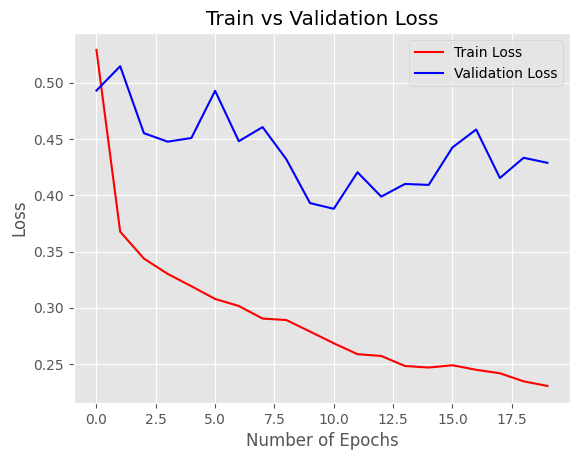

In [251]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.title("Train vs Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(train_losses, "r-", label='Train Loss')
plt.plot(validation_losses, "b-", label ='Validation Loss')
plt.legend(loc="upper right")

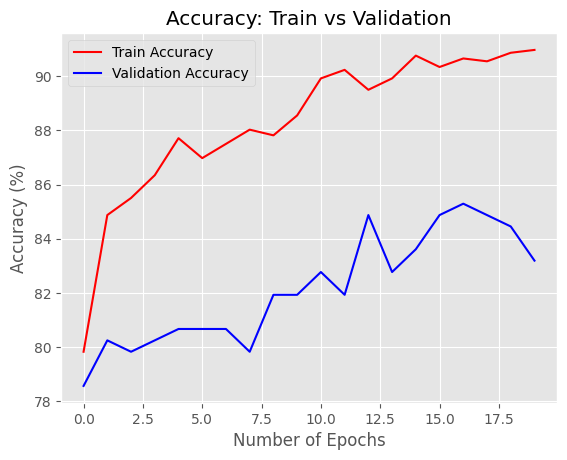

In [252]:
plt.title("Accuracy: Train vs Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracies, "r-", label='Train Accuracy')
plt.plot(validation_accuracies, 'b-', label='Validation Accuracy')
plt.legend(loc="upper left")

In [225]:
#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [226]:
index_of_test=30

In [227]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")


Neural network response is: 0
Actual response is: 0
